Generating 10 synthetic face images...
Download complete.



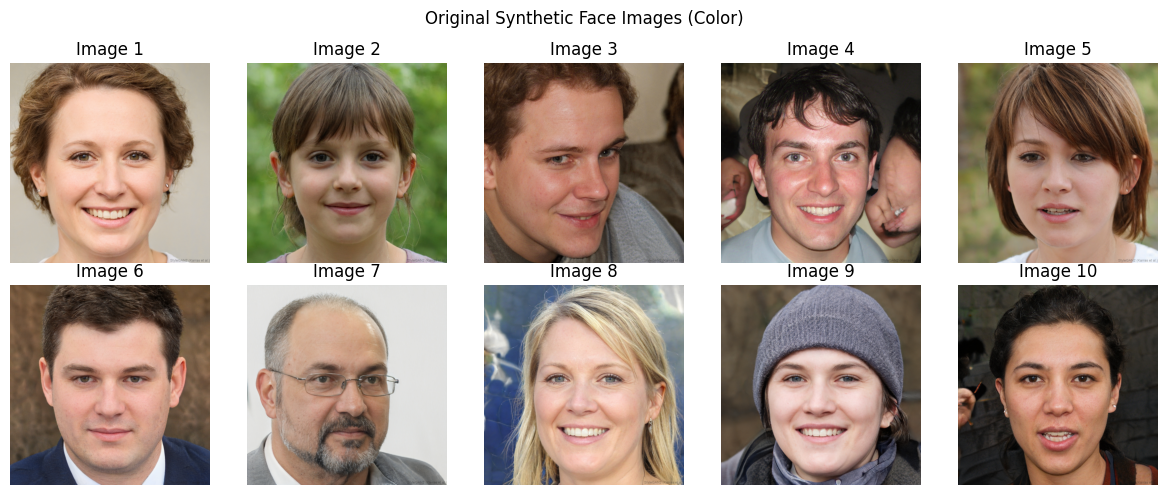

Step 1: Image Matrix (X)
Shape of X = (10, 10000)
Each row = one flattened grayscale image



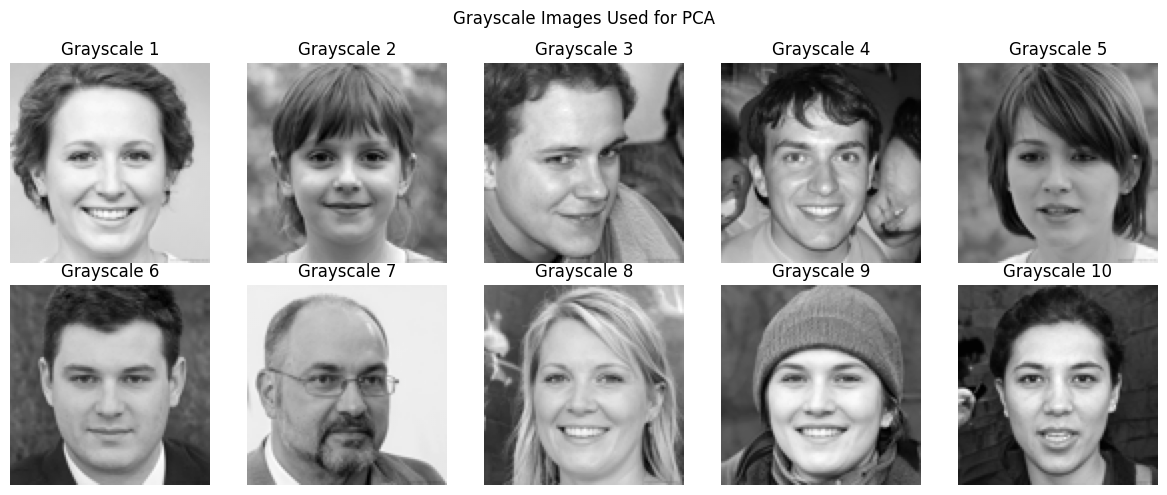

Step 2: Mean Face Vector Computed
Shape of mean_face = (10000,)


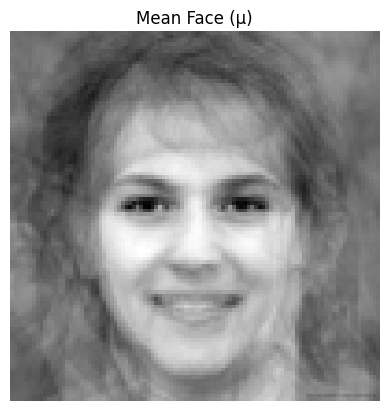

Step 3: Mean-Subtracted Matrix (A)
Shape of A = (10, 10000)

Formula:
A = X - μ
→ Each row of A is (image_i - mean_face)



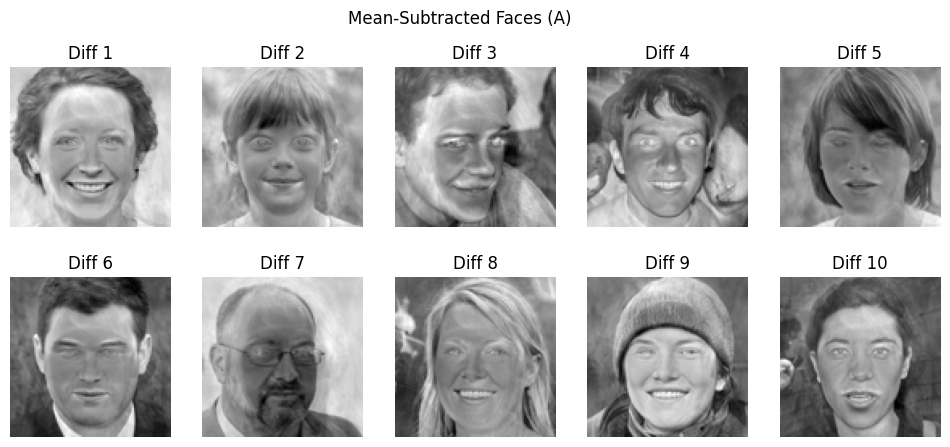

Step 4: Covariance Matrix (L)
Shape of L = (10, 10)

Formula:
Covariance matrix approximation: L = A Aᵀ
→ Instead of computing 10,000×10,000 covariance, we compute 10×10

Step 5: Eigen Decomposition
L v = λ v
Eigenvalues shape = (10,)
Eigenvectors shape = (10, 10)

Step 6: Eigenfaces Computed
Shape of Eigenfaces = (10000, 10)

Formula:
Eigenfaces = Aᵀ v_i  (from small covariance trick)



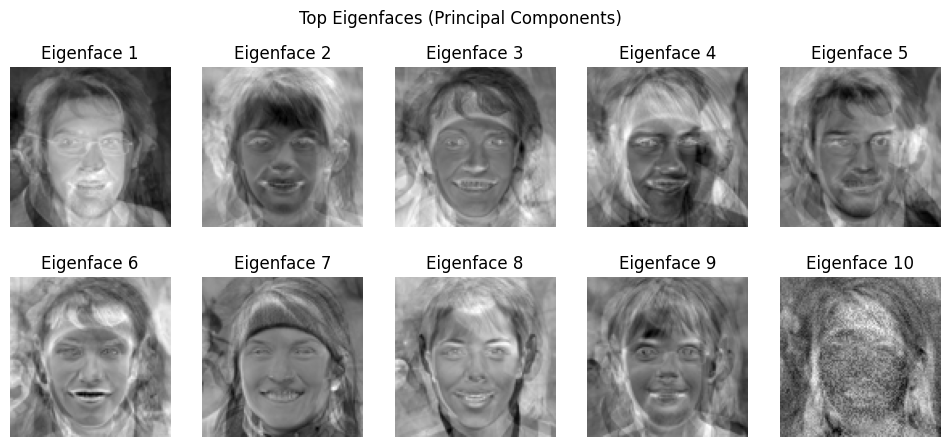

Step 7: Projection

Formula:
Weights = eigenfacesᵀ × (image - mean_face)

Shape of Weights Matrix = (10, 10) → Each column = projection of one face

Step 8: Recognition Result
Test image most similar to → Image 1
Euclidean distance = 0.0000



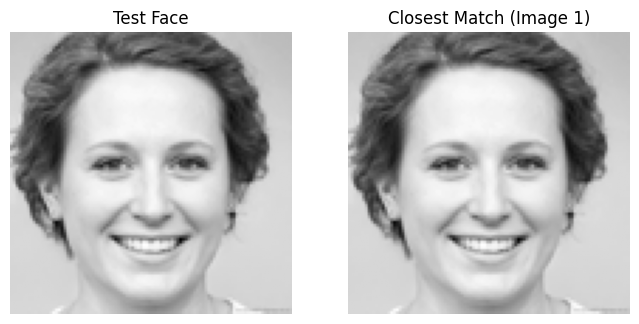

Step 9: Reconstruction of Test Face using Top k Eigenfaces
Using k = 10 Eigenfaces


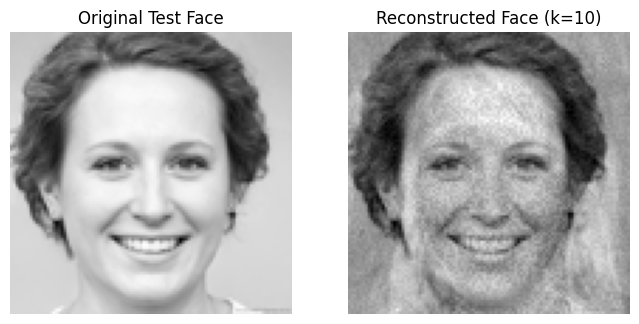


Summary:
• Each image → vector of length 10,000 (100×100)
• Mean face computed → subtracted from all images
• Eigenfaces → principal components (basis faces)
• Each face → projected into low-dimensional eigenface space
• Recognition → based on Euclidean distance between weight vectors


In [1]:
# ------------------------------------------
# STEP 1: Generate, Display (Color), Convert to Grayscale, and Load Images
# ------------------------------------------

import os
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create folder for synthetic faces
image_dir = "/content/synthetic_faces"
os.makedirs(image_dir, exist_ok=True)

# Download 10 synthetic face images (COLOR)
print("Generating 10 synthetic face images...")
for i in range(10):
    url = "https://thispersondoesnotexist.com/"
    img_data = requests.get(url).content
    with open(os.path.join(image_dir, f"face_{i+1}.jpg"), "wb") as f:
        f.write(img_data)

print("Download complete.\n")

# ------------------------------------------
# Display Original COLOR Images
# ------------------------------------------
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(10):
    img = Image.open(os.path.join(image_dir, f"face_{i+1}.jpg"))
    axes[i].imshow(img)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.suptitle("Original Synthetic Face Images (Color)")
plt.tight_layout()
plt.show()

# ------------------------------------------
# Convert to Grayscale & Preprocess
# ------------------------------------------
image_size = (100, 100)
images = []

for i in range(10):
    img_path = os.path.join(image_dir, f"face_{i+1}.jpg")
    img = Image.open(img_path).convert('L')   # Convert to grayscale
    img = img.resize(image_size)
    images.append(np.asarray(img, dtype='float64').flatten())

X = np.array(images)
n_samples, n_features = X.shape

print("Step 1: Image Matrix (X)")
print(f"Shape of X = ({n_samples}, {n_features})")
print("Each row = one flattened grayscale image\n")

# Safety check
assert n_samples == 10, "Error: Dataset must contain exactly 10 images"

# ------------------------------------------
# Display Grayscale Images Used for PCA
# ------------------------------------------
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(n_samples):
    axes[i].imshow(X[i].reshape(image_size), cmap='gray')
    axes[i].set_title(f"Grayscale {i+1}")
    axes[i].axis('off')

plt.suptitle("Grayscale Images Used for PCA")
plt.tight_layout()
plt.show()



# ------------------------------------------
# STEP 2: Compute Mean Face
# ------------------------------------------
mean_face = np.mean(X, axis=0)
print("Step 2: Mean Face Vector Computed")
print(f"Shape of mean_face = {mean_face.shape}")

plt.imshow(mean_face.reshape(image_size), cmap='gray')
plt.title("Mean Face (μ)")
plt.axis('off')
plt.show()

# ------------------------------------------
# STEP 3: Mean Subtraction
# ------------------------------------------
A = X - mean_face
print("Step 3: Mean-Subtracted Matrix (A)")
print(f"Shape of A = ({A.shape[0]}, {A.shape[1]})")

print("\nFormula:")
print("A = X - μ")
print("→ Each row of A is (image_i - mean_face)\n")

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()
for i in range(n_samples):
    axes[i].imshow(A[i].reshape(image_size), cmap='gray')
    axes[i].set_title(f"Diff {i+1}")
    axes[i].axis('off')
plt.suptitle("Mean-Subtracted Faces (A)")
plt.show()

# ------------------------------------------
# STEP 4: Covariance Trick (L = A Aᵀ)
# ------------------------------------------
L = np.dot(A, A.T)
print("Step 4: Covariance Matrix (L)")
print(f"Shape of L = {L.shape}")
print("\nFormula:")
print("Covariance matrix approximation: L = A Aᵀ")
print("→ Instead of computing 10,000×10,000 covariance, we compute 10×10\n")

# ------------------------------------------
# STEP 5: Eigen Decomposition
# ------------------------------------------
eigenvalues, eigenvectors = np.linalg.eig(L)

# Sort in descending order
idx = np.argsort(-eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Step 5: Eigen Decomposition")
print("L v = λ v")
print(f"Eigenvalues shape = {eigenvalues.shape}")
print(f"Eigenvectors shape = {eigenvectors.shape}\n")

# ------------------------------------------
# STEP 6: Compute Actual Eigenfaces
# ------------------------------------------
eigenfaces = np.dot(A.T, eigenvectors)
for i in range(eigenfaces.shape[1]):
    eigenfaces[:, i] /= np.linalg.norm(eigenfaces[:, i])  # Normalize

print("Step 6: Eigenfaces Computed")
print(f"Shape of Eigenfaces = {eigenfaces.shape}")
print("\nFormula:")
print("Eigenfaces = Aᵀ v_i  (from small covariance trick)\n")

# Display Top 10 Eigenfaces
k = min(10, n_samples)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()
for i in range(k):
    axes[i].imshow(eigenfaces[:, i].reshape(image_size), cmap='gray')
    axes[i].set_title(f"Eigenface {i+1}")
    axes[i].axis('off')
plt.suptitle("Top Eigenfaces (Principal Components)")
plt.show()

# ------------------------------------------
# STEP 7: Projection into Eigenface Space
# ------------------------------------------
print("Step 7: Projection")
print("\nFormula:")
print("Weights = eigenfacesᵀ × (image - mean_face)\n")

weights_all = np.dot(eigenfaces.T, A.T)
print(f"Shape of Weights Matrix = {weights_all.shape} → Each column = projection of one face\n")

# ------------------------------------------
# STEP 8: Face Recognition
# ------------------------------------------
test_face = X[0]
test_vector = test_face - mean_face
weights_test = np.dot(eigenfaces.T, test_vector)

distances = np.linalg.norm(weights_all - weights_test.reshape(-1, 1), axis=0)
closest = np.argmin(distances)

print("Step 8: Recognition Result")
print(f"Test image most similar to → Image {closest+1}")
print(f"Euclidean distance = {distances[closest]:.4f}\n")

# Display result
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(test_face.reshape(image_size), cmap='gray')
ax[0].set_title("Test Face")
ax[0].axis('off')

ax[1].imshow(X[closest].reshape(image_size), cmap='gray')
ax[1].set_title(f"Closest Match (Image {closest+1})")
ax[1].axis('off')
plt.show()

# ------------------------------------------
# STEP 9: Face Reconstruction
# ------------------------------------------
reconstructed = mean_face + np.dot(eigenfaces[:, :k], weights_test[:k])
print("Step 9: Reconstruction of Test Face using Top k Eigenfaces")
print(f"Using k = {k} Eigenfaces")

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(test_face.reshape(image_size), cmap='gray')
ax[0].set_title("Original Test Face")
ax[0].axis('off')

ax[1].imshow(reconstructed.reshape(image_size), cmap='gray')
ax[1].set_title(f"Reconstructed Face (k={k})")
ax[1].axis('off')
plt.show()

print("\nSummary:")
print("• Each image → vector of length 10,000 (100×100)")
print("• Mean face computed → subtracted from all images")
print("• Eigenfaces → principal components (basis faces)")
print("• Each face → projected into low-dimensional eigenface space")
print("• Recognition → based on Euclidean distance between weight vectors")